In [3]:
pip install pymongo


  Obtaining dependency information for pymongo from https://files.pythonhosted.org/packages/50/16/d5b3e2d5d23e81bfd0a1bc04a038f7075992ebffa361f789880a155a2c61/pymongo-4.6.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for dnspython<3.0.0,>=1.16.0 from https://files.pythonhosted.org/packages/f6/b4/0a9bee52c50f226a3cbfb54263d02bb421c7f2adc136520729c2c689c1e5/dnspython-2.4.2-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/472.7 kB ? eta -:--:--
   ---------------------------------------- 0.0/472.7 kB ? eta -:--:--
   ---------------------------------------- 0.0/472.7 kB ? eta -:--:--
   ---------------------------------------- 0.0/472.7 kB ? eta -:--:--
   ---------------------------------------- 0.0/472.7 kB ? eta -:--:--
   ---------------------------------------- 0.0/472.7 kB ? eta -:--:--
   ---------------------------------------- 0.0/472.7 kB ? eta -:--:--
   ---------------------------------------- 0.0/472.7 kB ? eta -:--:--
   --

In [43]:
import pymongo
from pymongo import MongoClient
client = MongoClient()
db = client.project
for student in db.performance.find():
    print(student)

{'_id': ObjectId('65566162f20144537f7a525c'), 'study_hours': 6.789593965981179, 'attendance': 78.13155338992111, 'pass_fail': 1}
{'_id': ObjectId('65566162f20144537f7a525d'), 'study_hours': 8.339152856093508, 'attendance': 84.88346800911494, 'pass_fail': 1}
{'_id': ObjectId('65566162f20144537f7a525e'), 'study_hours': 1.6406978361420608, 'attendance': 61.015454226413794, 'pass_fail': 0}
{'_id': ObjectId('65566162f20144537f7a525f'), 'study_hours': 3.178497443603504, 'attendance': 65.10321211182256, 'pass_fail': 0}
{'_id': ObjectId('65566162f20144537f7a5260'), 'study_hours': 9.168098265334837, 'attendance': 64.82543484402403, 'pass_fail': 0}
{'_id': ObjectId('65566162f20144537f7a5261'), 'study_hours': 4.06723186227716, 'attendance': 86.72340546282585, 'pass_fail': 0}
{'_id': ObjectId('65566162f20144537f7a5262'), 'study_hours': 1.209447421622433, 'attendance': 86.35695767640605, 'pass_fail': 0}
{'_id': ObjectId('65566162f20144537f7a5263'), 'study_hours': 3.051416462877475, 'attendance': 84

In [46]:
import pandas as pd
per_list= list(db.performance.find())
per_df = pd.DataFrame(per_list)
# df = df.drop('_id',axis=1)

In [47]:
print(per_df)

                          _id  study_hours  attendance  pass_fail
0    65566162f20144537f7a525c     6.789594   78.131553          1
1    65566162f20144537f7a525d     8.339153   84.883468          1
2    65566162f20144537f7a525e     1.640698   61.015454          0
3    65566162f20144537f7a525f     3.178497   65.103212          0
4    65566162f20144537f7a5260     9.168098   64.825435          0
..                        ...          ...         ...        ...
495  65566162f20144537f7a544b     4.693446   68.253349          0
496  65566162f20144537f7a544c     8.284250   64.425269          0
497  65566162f20144537f7a544d     4.371514   80.087800          0
498  65566162f20144537f7a544e     7.308722   70.892293          1
499  65566162f20144537f7a544f     3.829204   67.080419          0

[500 rows x 4 columns]


In [48]:
per_df = per_df.drop('_id',axis=1)

In [49]:
print(per_df)

     study_hours  attendance  pass_fail
0       6.789594   78.131553          1
1       8.339153   84.883468          1
2       1.640698   61.015454          0
3       3.178497   65.103212          0
4       9.168098   64.825435          0
..           ...         ...        ...
495     4.693446   68.253349          0
496     8.284250   64.425269          0
497     4.371514   80.087800          0
498     7.308722   70.892293          1
499     3.829204   67.080419          0

[500 rows x 3 columns]


In [54]:
import numpy as np 
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

X = per_df.iloc[:,0:2]
y = per_df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.85


In [55]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')  # Change 'macro' to 'micro' or 'weighted' if needed
recall = recall_score(y_test, y_pred, average='macro')  # Change 'macro' to 'micro' or 'weighted' if needed
f1 = f1_score(y_test, y_pred, average='macro')  # Change 'macro' to 'micro' or 'weighted' if needed
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.85
Precision: 0.85
Recall: 0.84
F1 Score: 0.84
Confusion Matrix:
[[52  7]
 [ 8 33]]


In [56]:
per_df.corr()

,study_hours,attendance,pass_fail
study_hours,1.000000,0.010354,0.637429
attendance,0.010354,1.000000,0.387979
pass_fail,0.637429,0.387979,1.000000


<Axes: >

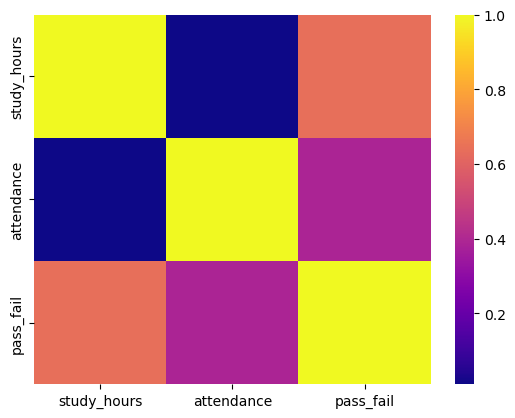

In [53]:
sns.heatmap(per_df.corr(),cmap = 'plasma')